In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [31]:
# Load the CSV file into a DataFrame
data = pd.read_csv("rocket_orientation_data.csv")

# Drop a specific column by specifying its name
column_to_drop = 'Timestamp'
cleaned_data = data.drop(columns=[column_to_drop])

# Save the cleaned DataFrame back to a CSV file
cleaned_data.to_csv("cleaned_data.csv", index=False)


In [32]:
numeric_columns = cleaned_data.select_dtypes(include=[np.number])

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(numeric_columns)

normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns)

print(normalized_df)

          Qc0       Qc1       Qc2       Qc3
0    0.616812  0.686408  0.172623  0.401236
1    0.603369  0.753447  0.037645  0.329942
2    0.768584  0.285632  0.160960  0.583384
3    0.728682  0.585692  0.371503  0.148524
4    0.626023  0.780016  0.182582  0.063706
..        ...       ...       ...       ...
495  0.730980  0.557420  0.310562  0.305164
496  0.446716  0.499947  0.562357  0.546099
497  0.782917  0.039187  0.144810  0.635849
498  0.629262  0.448687  0.637107  0.217013
499  0.414216  0.540547  0.269930  0.727020

[500 rows x 4 columns]


In [33]:

from sklearn.preprocessing import StandardScaler

numeric_columns = cleaned_data.select_dtypes(include=[np.number])

scaler = StandardScaler()

standardized_data = scaler.fit_transform(numeric_columns)

data[numeric_columns.columns] = standardized_data

print(data)

     Timestamp       Qc0       Qc1       Qc2       Qc3
0          0.0  0.672527  0.982931 -1.154722 -0.245404
1         20.0  0.615845  1.262404 -1.708936 -0.544413
2         40.0  1.312497 -0.687812 -1.202611  0.518526
3         60.0  1.144241  0.563071 -0.338133 -1.305287
4         80.0  0.711370  1.373166 -1.113833 -1.661014
..         ...       ...       ...       ...       ...
495     9900.0  1.153935  0.445211 -0.588353 -0.648334
496     9920.0 -0.044704  0.205621  0.445506  0.362152
497     9940.0  1.372935 -1.715184 -1.268924  0.738568
498     9960.0  0.725027 -0.008070  0.752426 -1.018041
499     9980.0 -0.181746  0.374870 -0.755187  1.120942

[500 rows x 5 columns]


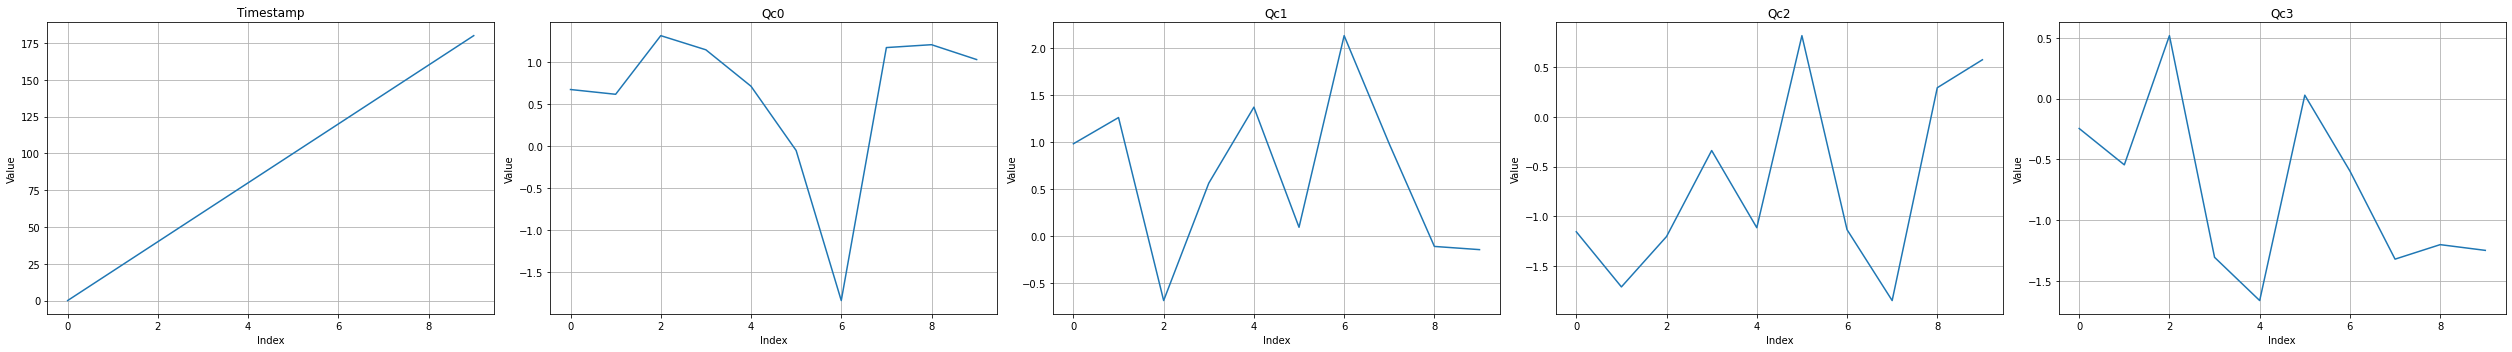

In [36]:
column_names = data.columns
sg_data = data[:10]
# Determine the number of rows and columns for subplots
num_cols = len(column_names)
num_rows = 1

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(35, 5))

# Loop through each column and create a subplot
for i, column in enumerate(column_names):
    ax = axes[i]
    sg_data[column].plot(ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.grid()

plt.tight_layout()
plt.show()

C:\Users\koush\AppData\Local\Temp\ipykernel_10988\533104263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_data['diff_qc1_qc0'] = sg_data['Qc1'] - sg_data['Qc0']
C:\Users\koush\AppData\Local\Temp\ipykernel_10988\533104263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sg_data['diff_qc2_qc0'] = sg_data['Qc2'] - sg_data['Qc0']
C:\Users\koush\AppData\Local\Temp\ipykernel_10988\533104263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

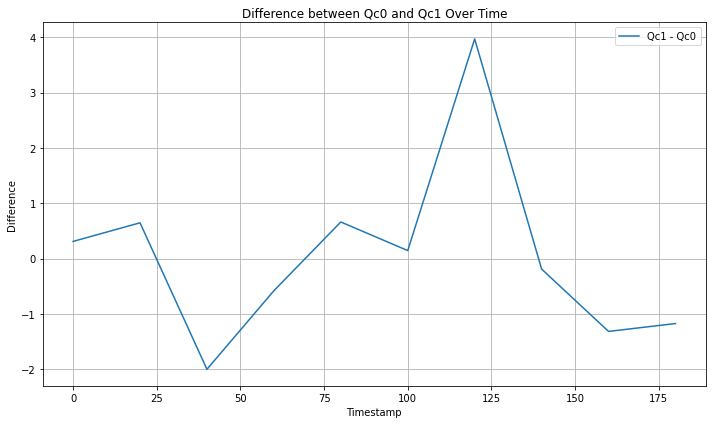

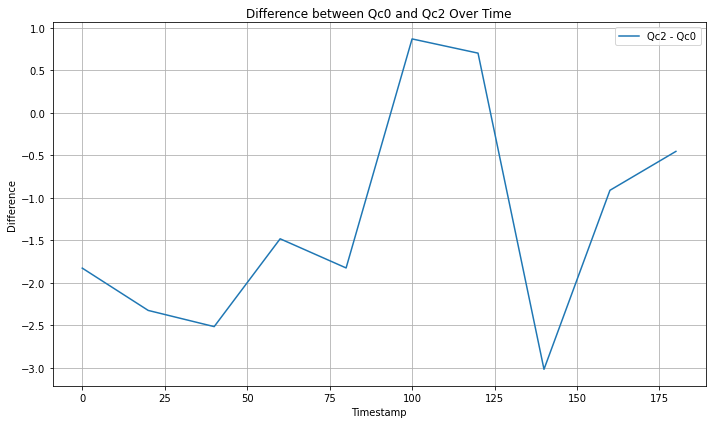

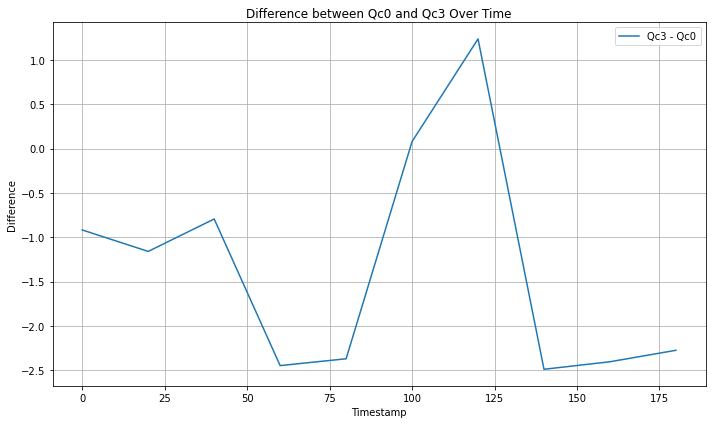

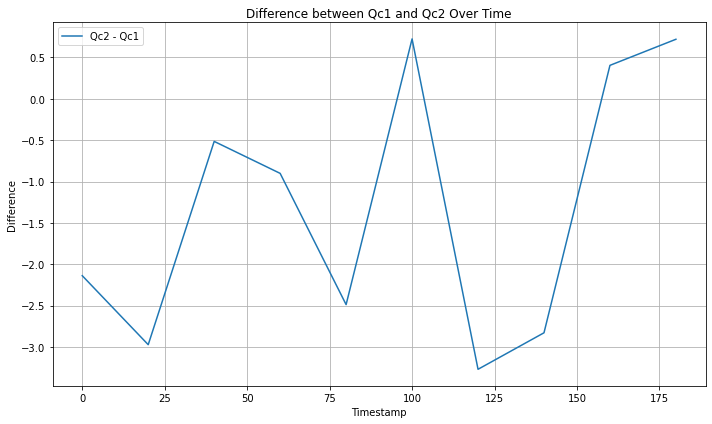

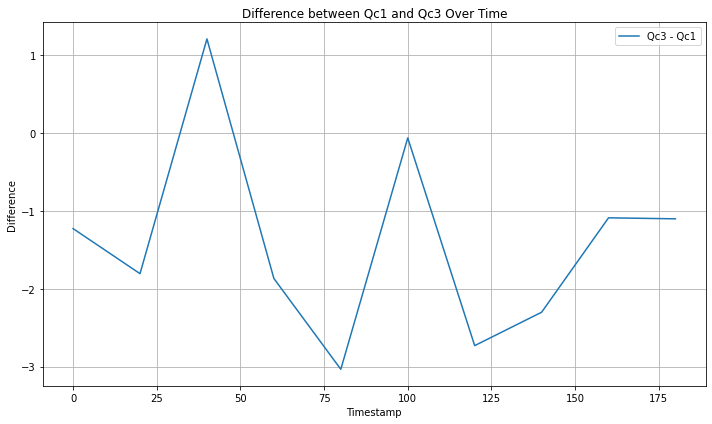

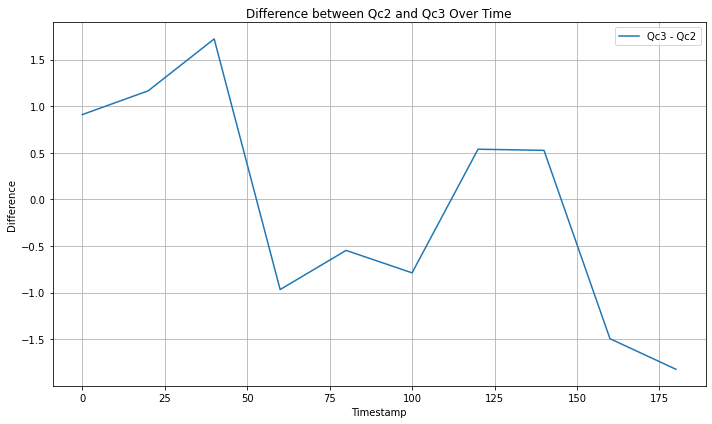

In [37]:
#sg_data = data[:10]
sg_data['diff_qc1_qc0'] = sg_data['Qc1'] - sg_data['Qc0']
sg_data['diff_qc2_qc0'] = sg_data['Qc2'] - sg_data['Qc0']
sg_data['diff_qc3_qc0'] = sg_data['Qc3'] - sg_data['Qc0']
sg_data['diff_qc2_qc1'] = sg_data['Qc2'] - sg_data['Qc1']
sg_data['diff_qc3_qc1'] = sg_data['Qc3'] - sg_data['Qc1']
sg_data['diff_qc3_qc2'] = sg_data['Qc3'] - sg_data['Qc2']

# Plot the difference between 'Qc1' and 'Qc0'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc1_qc0'], label='Qc1 - Qc0')
plt.title('Difference between Qc0 and Qc1 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the difference between 'Qc2' and 'Qc0'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc2_qc0'], label='Qc2 - Qc0')
plt.title('Difference between Qc0 and Qc2 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the difference between 'Qc3' and 'Qc0'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc3_qc0'], label='Qc3 - Qc0')
plt.title('Difference between Qc0 and Qc3 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the difference between 'Qc2' and 'Qc1'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc2_qc1'], label='Qc2 - Qc1')
plt.title('Difference between Qc1 and Qc2 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the difference between 'Qc3' and 'Qc1'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc3_qc1'], label='Qc3 - Qc1')
plt.title('Difference between Qc1 and Qc3 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plot the difference between 'Qc3' and 'Qc2'
plt.figure(figsize=(10, 6))
plt.plot(sg_data['Timestamp'], sg_data['diff_qc3_qc2'], label='Qc3 - Qc2')
plt.title('Difference between Qc2 and Qc3 Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()